In [37]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

<div>
<img src="heart_disease.jpg" width="400"/>
</div>


In [14]:
url= 'https://raw.githubusercontent.com/YogevLD/DS_test/main/CHD_preprocessed%20(1).csv'
heart_diseases= pd.read_csv(url)
heart_diseases.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,0,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,0,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,1,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,1,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


### We will checking the data:

- Treat missing values (if needed)
- Treat column names (if needed)
- Treat data types (if needed)

### Treat missing values

#### Check if there are missing values:

In [15]:
pd.DataFrame(heart_diseases.isnull().sum())

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


### Fixing data types
##### Check if any of the data types need to be fixed:

In [16]:
pd.DataFrame(heart_diseases.dtypes)

,0
male,int64
age,int64
education,int64
currentSmoker,int64
cigsPerDay,int64
BPMeds,int64
prevalentStroke,int64
prevalentHyp,int64
diabetes,int64
totChol,int64


### About the data:
##### The data is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. 
##### The data includes 15 columns of medical and behavioral parameters and the target column is TenYearCHD.
##### About "TenYearCHD",The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).

- Creates two new columns that will hold categorical rather than Boolean values for the male and TenYearCHD columns,in order to make it more readable to display them.

In [17]:
heart_diseases["male/female"]=heart_diseases["male"].replace({1:"male",0:"female"})
heart_diseases["Chance of getting sick"]=heart_diseases["TenYearCHD"].replace({1:"Yes",0:"No"})
heart_diseases.head(4)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,male/female,Chance of getting sick
0,1,39,1,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0,male,No
1,0,46,0,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0,female,No
2,1,48,0,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0,male,No
3,0,61,1,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1,female,Yes


### Understanding the data.

<div>
<img src="heart_disease4.jpg" width="400"/>
</div>


### How many male and female?

In [18]:
pd.DataFrame(heart_diseases['male/female'].value_counts())

,male/female
female,2367
male,1766


<AxesSubplot:ylabel='male/ female'>

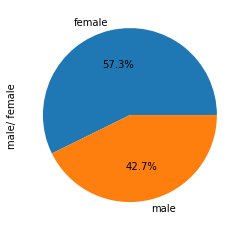

In [41]:
heart_diseases['male/female'].value_counts().plot.pie(label="male/ female",autopct='%1.1f%%')

##### Study the differences between males and females:


In [20]:
heart_diseases_male = heart_diseases[heart_diseases.male==1].copy()
heart_diseases_male.head(2)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,male/female,Chance of getting sick
0,1,39,1,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0,male,No
2,1,48,0,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0,male,No


In [21]:
heart_diseases_female = heart_diseases[heart_diseases.male==0].copy()
heart_diseases_female.head(2)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,male/female,Chance of getting sick
1,0,46,0,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0,female,No
3,0,61,1,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1,female,Yes


### Who smokes more? Men or women?

Text(0.5, 0, 'Male/Female')

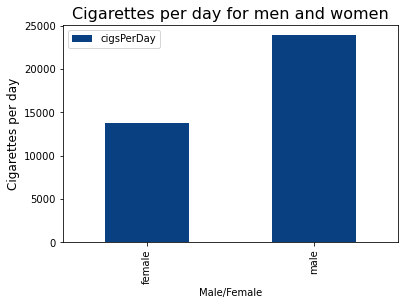

In [23]:
ax=heart_diseases.pivot_table("cigsPerDay","male/female",aggfunc=sum).plot(kind="bar",colormap="GnBu_r")
ax.set_title('Cigarettes per day for men and women',fontsize=16)
ax.set_ylabel("Cigarettes per day",fontsize=12)
ax.set_xlabel("Male/Female")

- We can learn important thing - men smoke more than women,this is despite the fact that there are almost 15% more women in the data.


### How does the amount of cigarettes that people smoke during their lives change?
- We grouped by age groups of 30-50 and 50-70 because the main ages in the data are 40,50 years old and we wanted to create balanced sample as possible.

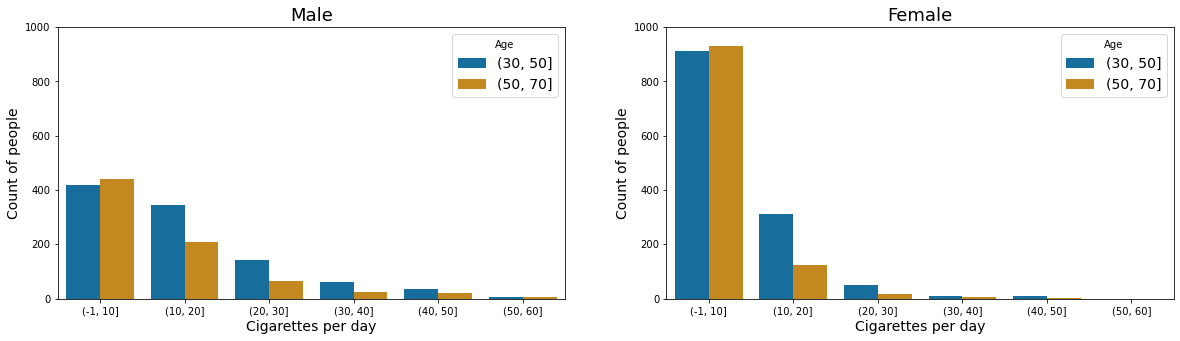

In [24]:
fig,axes = plt.subplots(figsize=(20,5),ncols=2)
McigsPerDay= pd.cut(heart_diseases_male["cigsPerDay"],[-1,10,20,30,40,50,60])
FcigsPerDay= pd.cut(heart_diseases_female["cigsPerDay"],[-1,10,20,30,40,50,60])

Mage = pd.cut(heart_diseases_male['age'], [30,50,70])
Fage = pd.cut(heart_diseases_female['age'], [30,50,70])

sns.countplot(ax=axes[0],data= heart_diseases_male,x=McigsPerDay,hue=Mage,palette="colorblind")
axes[0].set_title('Male',fontsize=18)
axes[0].legend(loc="upper right",title="Age",fontsize=14)
axes[0].set_ylabel("Count of people",fontsize=14)
axes[0].set_xlabel("Cigarettes per day",fontsize=14)
axes[0].set(ylim=(-1,1000))
sns.countplot(ax=axes[1],data=heart_diseases_female,x=FcigsPerDay,hue=Fage,palette="colorblind")
axes[1].set_title('Female',fontsize=18)
axes[1].legend(loc="upper right",title="Age",fontsize=14)
axes[1].set_ylabel("Count of people",fontsize=14)
axes[1].set_xlabel("Cigarettes per day",fontsize=14)
axes[1].set(ylim=(-1,1000))
plt.show()


- From the graph we can learn that when we compared the two age groups we saw that in general the older population smokes less than the younger population and in particular the older population smokes more single cigarettes (1-10 cigarettes per day that is a small amount of cigarettes per day)

- We only took the age group 30-40 as people at these ages tend to be healthier, we wanted to see the effect of smoking on the risk of getting sick without the addition of age-dependent risk factors. 

In [25]:
age=pd.cut(heart_diseases_female['age'],[30,40])
heart_diseases_female.pivot_table("cigsPerDay",["male/female",age],"Chance of getting sick")

,Chance of getting sick,No,Yes
male/female,age,,
female,"(30, 40]",7.835052,14.6875


In [26]:
age2=pd.cut(heart_diseases_male['age'],[30,40])
heart_diseases_male.pivot_table("cigsPerDay",["male/female",age2],"Chance of getting sick")

,Chance of getting sick,No,Yes
male/female,age,,
male,"(30, 40]",15.07541,16.952381


#### What conclusions can we draw so far?

- During the data analysis we saw that over the age of 40 the number of cigarettes smoked by people with a risk of  getting sick and without a risk of getting sick is almost the same, meaning that it does not matter how many        cigarettes people smoke.

- A very interesting thing that can be seen is that in order for a woman to have a chance of getting heart disease she has to smoke a lot more than a man,this led us to examine whether gender is a significant factor in the chance of developing heart disease.


#### Who has a higher risk of developing heart disease in the next ten years men or women?


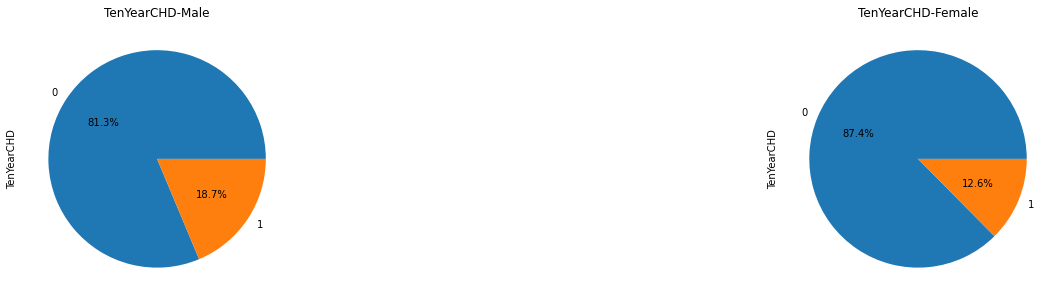

In [44]:
fig,axes = plt.subplots(figsize=(25,5),ncols=2)

heart_diseases_male['TenYearCHD'].value_counts().plot.pie(ax=axes[0],autopct="%1.1f%%", title = "TenYearCHD-Male" )
heart_diseases_female['TenYearCHD'].value_counts().plot.pie(ax=axes[1],autopct="%1.1f%%", title ="TenYearCHD-Female")
plt.show()

- Important conclusion - Men's we are sorry but:
   We can see that men have a higher risk of developing heart disease in the next ten years(although the number of women in the survey is greater).

#### We want to see the distribution of cholesterol and glucose values in men and women.

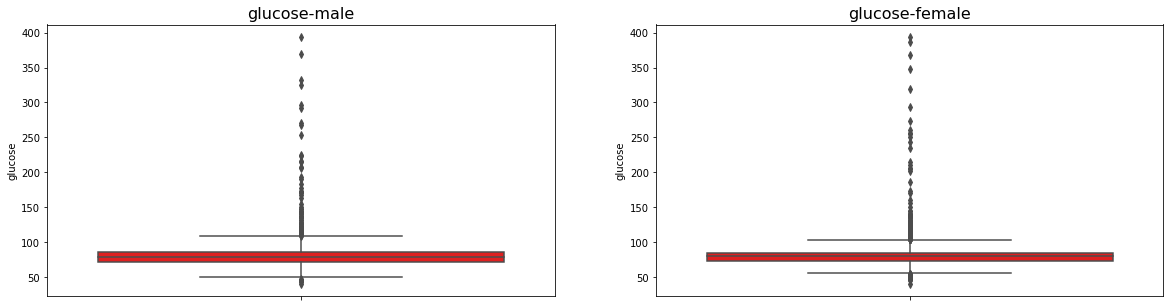

In [27]:
fig,axes= plt.subplots(figsize=(20,5),ncols=2)
sns.boxplot(ax=axes[0],y='glucose',data=heart_diseases_male,color='red')
axes[0].set_title('glucose-male',fontsize=16)
sns.boxplot(ax=axes[1],y='glucose',data=heart_diseases_female,color='red')
axes[1].set_title('glucose-female',fontsize=16)
plt.show()

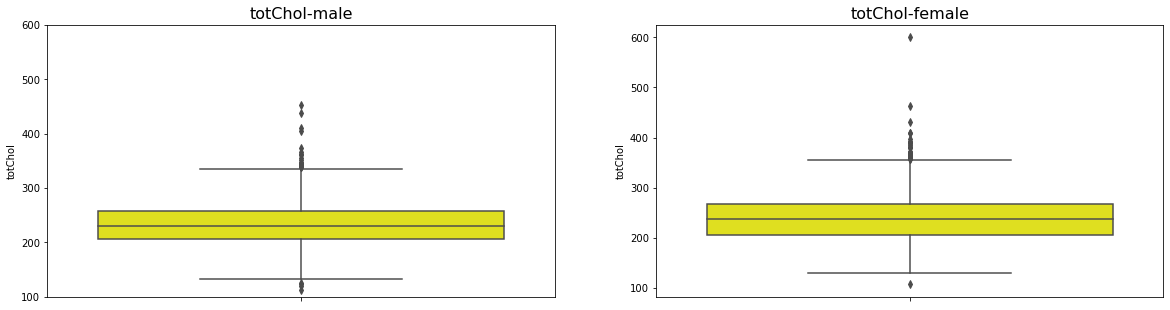

In [28]:
fig,axes= plt.subplots(figsize=(20,5),ncols=2)
sns.boxplot(ax=axes[0],y='totChol',data=heart_diseases_male,color='yellow')
axes[0].set_title('totChol-male',fontsize=16)
axes[0].set(ylim=(100,600))
sns.boxplot(ax=axes[1],y='totChol',data=heart_diseases_female,color='yellow')
axes[1].set_title('totChol-female',fontsize=16)
plt.show()

- We can see that the distribution of the values we tested is a bit unusual, the average is in normal values but we have a lot off the lines.

- Although cholesterol levels are slightly high, given the fact that these are Americans, the values are normal (Americans's, normal cholesterol values are about 6% higher than in other Western countries).

- This finding leads us to another important conclusion in any data related to disease prediction- Most of the population is healthy! This conclusion makes it very difficult to predict who will be sick and who will not

#### Because of the previous conclusion we raised:
- At first we tried to predict with the help of several models who would be sick and who would not, the accuracy of the models was high, about 90 percent success, but no model was able to predict patients at all.
- We then realized that no model can predict patients because there are almost no patients (something we mentioned earlier) so he will constantly predict that the patient will be healthy and thus be right in 90 percent of cases.
- So we cut from our data 82 percent of healthy patients in order to create a 50/50 sensible ratio of patients vs healthy.

<div>
<img src="heart_disease3.jpg" style="width:350px;height;150px"/>
</div>


##### This is the ratio of patients vs healthy before we cut the data.

In [29]:
pd.DataFrame(heart_diseases['TenYearCHD'].value_counts())

,TenYearCHD
0,3505
1,628


##### Here we cut 82% of the healthy patients and redefine our data.

In [31]:
drop_idx = heart_diseases[heart_diseases['TenYearCHD']==0].sample(frac=0.82,random_state=6).index
heart_diseases_new=heart_diseases.drop(drop_idx).copy()

##### This is the ratio of patients vs healthy after we cut the data.

In [32]:
pd.DataFrame(heart_diseases_new['TenYearCHD'].value_counts())

,TenYearCHD
0,631
1,628


##### Define the features and target of the model.
##### Split the data into 30% test and 70% training.

In [33]:
features = ['age', 'totChol', 'BPMeds','glucose','cigsPerDay','diabetes','sysBP','diaBP']
X = heart_diseases_new[features]
y = heart_diseases_new['TenYearCHD']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=23) 

- Choose a random forest model.
- Fit the model.
- Make prediction.
- Check the accuracy of the model.

In [43]:
from sklearn.ensemble import RandomForestClassifier

random_f = RandomForestClassifier(min_samples_leaf=8,n_estimators=1000,max_depth=8, random_state=0, criterion='gini')
random_f.fit(X_train, y_train)
predrf = random_f.predict(X_test)
acc = sk.metrics.accuracy_score(predrf, y_test)
print("The accuracy of our model:",acc,"!")

The accuracy of our model: 0.6587301587301587 !


- Check by matrix In some cases we were right and in some cases we were wrong.

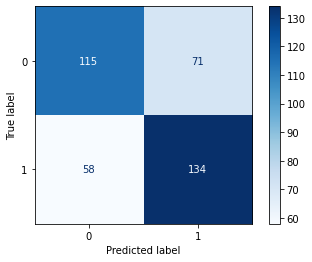

In [35]:
sk.metrics.plot_confusion_matrix(random_f, X_test, y_test, cmap=plt.cm.Blues)

- We can see that our accuracy has really decreased, but we have been able to predict a significant percentage of patients. 
- The percentage of patients since we were able to predict that they have a chance of getting sick is of great importance! These are people who now know they need to change their lifestyle / seek medical attention that can save their lives.